In [14]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
from pymongo import MongoClient
import matplotlib as plt



In [2]:
# I create the connection with the database called 'companies'.
client = MongoClient("localhost:27017")
db = client['geospatial']
companies = db.get_collection('aus_offices')

In [3]:
# I download the location of all the offices in australia from the database in mongo. And I clean those whick doesn't have coordinates.
offices = pd.DataFrame(list(companies.find({},{'_id':0})))
offices[['latitude','longitude']]
offices_no_nan = offices.dropna()
offices_no_nan[['latitude','longitude']]

,latitude,longitude
0,-37.879234,145.073608
1,-34.822723,138.612396
12,-34.819499,138.612894
15,-27.460736,153.004254
18,-37.802659,144.986855
...,...,...
256,-37.709071,144.863665
257,-37.711099,144.864650
258,-37.034419,143.743808
259,-33.868898,151.202966


In [4]:
# I create a heat map to know how the offices are distributed.

australia_map = Map (location = [-32.74, 145], zoom_start = 5)
HeatMap(data = offices_no_nan[["latitude","longitude"]]).add_to(australia_map)
australia_map
# We can see that there are only a few cities hosting all the offices.
# Perth, Adelaide, Victoria, Melbourne, Canberra, Sidney, Newcastle, Gold Coast, and Brisbane. But the highest concentration is in New South Wales.

In [5]:
australia_map.save('../maps/australia_offices.html')

In [7]:
# Let's check the population

population_australia = pd.read_excel('../data/Australian Bureau of Statistics.xlsx')

In [9]:
population_australia.dropna(inplace=True)

In [16]:

population_australia = population_australia.drop(population_australia.index[-1])

In [18]:
population_australia.columns=['state','population','increment','increment%']

In [19]:
population_australia

,state,population,increment,increment%
0,New South Wales,8153.6,59.8,0.7
1,Victoria,6613.7,65.7,1.0
2,Queensland,5322.1,104.4,2.0
3,South Australia,1820.5,17.3,1.0
4,Western Australia,2785.3,35.4,1.3
5,Tasmania,571.5,3.6,0.6
6,Northern Territory,250.6,1.4,0.6
7,Australian Capital Territory,456.7,3.1,0.7


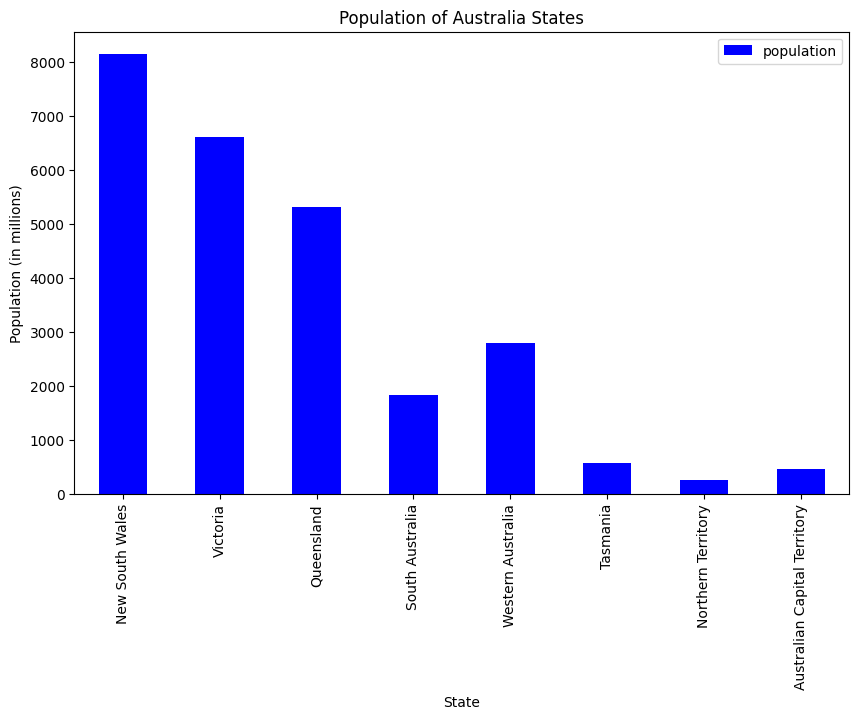

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# plot the population of each state
population_australia.plot(x='state', y='population', kind='bar', color='blue', figsize=(10, 6))

# add a title to the plot
plt.title("Population of Australia States")

# add x-axis and y-axis labels
plt.xlabel("State")
plt.ylabel("Population (in millions)")

# show the plot
plt.show()

In [ ]:
# We can see that New South Wales has the highest population.